## **DESCRIPTION**

CDP is a global non-profit that drives companies and governments to reduce their greenhouse gas emissions, safeguard water resources, and protect forests. Each year, CDP takes the information supplied in its annual reporting process and scores companies and cities based on their journey through disclosure and towards environmental leadership.

CDP houses the world’s largest, most comprehensive dataset on environmental action. As the data grows to include thousands more companies and cities each year, there is increasing potential for the data to be utilized in impactful ways. Because of this potential, CDP is excited to launch an analytics challenge for the Kaggle community. Data scientists will scour environmental information provided to CDP by disclosing companies and cities, searching for solutions to our most pressing problems related to climate change, water security, deforestation, and social inequity.

How do you help cities adapt to a rapidly changing climate amidst a global pandemic, but do it in a way that is socially equitable?

What are the projects that can be invested in that will help pull cities out of a recession, mitigate climate issues, but not perpetuate racial/social inequities?

What are the practical and actionable points where city and corporate ambition join, i.e. where do cities have problems that corporations affected by those problems could solve, and vice versa?

How can we measure the intersection between environmental risks and social equity, as a contributor to resiliency?

## **PROBLEM STATEMENT**
Develop a methodology for calculating key performance indicators (KPIs) that relate to the environmental and social issues that are discussed in the CDP survey data. Leverage external data sources and thoroughly discuss the intersection between environmental issues and social issues. Mine information to create automated insight generation demonstrating whether city and corporate ambitions take these factors into account.

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

#Importing Text Analysis Libraries:
from textblob import TextBlob
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer
!pip install textblob 
from nltk.corpus import stopwords
import nltk
nltk.download()
from nltk.sentiment.vader import SentimentIntensityAnalyzer as vader
print('Libraries Imported')

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.
NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> punkt
      Package punkt is already up-to-date!

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> gutenberg
      Package gutenberg is already up-to-date!

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
------------------------------------

/opt/conda/lib/python3.7/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [19]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## **CITIES:**

## **CITIES DISCLOSING**

In [20]:
c1=pd.read_csv('../input/cdp-unlocking-climate-solutions/Cities/Cities Disclosing/2018_Cities_Disclosing_to_CDP.csv')
c2=pd.read_csv('../input/cdp-unlocking-climate-solutions/Cities/Cities Disclosing/2019_Cities_Disclosing_to_CDP.csv')
c3=pd.read_csv('../input/cdp-unlocking-climate-solutions/Cities/Cities Disclosing/2020_Cities_Disclosing_to_CDP.csv')
c21=pd.read_csv('../input/cdp-unlocking-climate-solutions/Cities/Cities Responses/2018_Full_Cities_Dataset.csv')
c22=pd.read_csv('../input/cdp-unlocking-climate-solutions/Cities/Cities Responses/2019_Full_Cities_Dataset.csv')
c23=pd.read_csv('../input/cdp-unlocking-climate-solutions/Cities/Cities Responses/2020_Full_Cities_Dataset.csv')

In [21]:

c1

,Year Reported to CDP,Account Number,Organization,City,Country,CDP Region,Reporting Authority,Access,First Time Discloser,Population,Population Year,City Location,Last update
0,2018,58671,Helsingør Kommune / Elsinore Municipality,Helsingør,Denmark,Europe,CDP Cities,public,No,62686.0,2017,POINT (12.5921 56.0308),2020-06-25T04:52:49.050
1,2018,59167,Municipalidad de Providencia,Providencia,Chile,Latin America,CDP Cities,public,No,126487.0,2012,POINT (-70.6092 -33.4313),2020-06-25T04:52:49.050
2,2018,50553,City of Fresno,Fresno,United States of America,North America,CDP Cities,public,Yes,527438.0,2017,POINT (-119.773 36.7468),2020-06-25T04:52:49.050
3,2018,826407,Munícipio de Mirandela,Mirandela,Portugal,Europe,CDP Cities,public,Yes,11852.0,2011,POINT (-7.1753 41.51),2020-06-25T04:52:49.050
4,2018,60375,Gobiernación del Archipiélago de San Andrés,Archipiélago de San Andrés,Colombia,Latin America,CDP Cities,public,No,120000.0,2017,POINT (-81.6976 12.5794),2020-06-25T04:52:49.050
...,...,...,...,...,...,...,...,...,...,...,...,...,...
636,2018,74631,Lubumbashi,Lubumbashi,Democratic Republic of the Congo,Africa,CDP Cities,public,Yes,5652000.0,2016,POINT (-27 11),2020-06-25T04:52:49.050
637,2018,60898,Ayuntamiento de Naucalpan de Juárez,Naucalpan de Juárez,Mexico,Latin America,CDP Cities,public,No,NaN,0,POINT (-99.2453 19.4631),2020-06-25T04:52:49.050
638,2018,60638,Walvis Bay Municipality,Walvis Bay,Namibia,Africa,CDP Cities,non public,No,100000.0,2016,POINT (12.5247 -22.9389),2020-06-25T04:52:49.050
639,2018,35995,City of Brasília,Brasília,Brazil,Latin America,CDP Cities,non public,No,3013.0,2017,POINT (-47.8822 -15.7942),2020-06-25T04:52:49.050


In [22]:
c2

,Year Reported to CDP,Account Number,Organization,City,Country,CDP Region,Reporting Authority,Access,First Time Discloser,Population,Population Year,City Location,Last update
0,2019,840309,Markaryds Kommun,NaN,Sweden,Europe,"CDP Cities,ICLEI - Local Governments for Susta...",public,Yes,NaN,0,NaN,2020-06-25T04:52:51.327
1,2019,54609,Alcaldia de Trujillo,Trujillo,Peru,Latin America,CDP Cities,public,Yes,971116.0,217,NaN,2020-06-25T04:52:51.327
2,2019,840914,Prefeitura de Cáceres,NaN,Brazil,Latin America,CDP Cities,public,Yes,NaN,0,NaN,2020-06-25T04:52:51.327
3,2019,841416,Municipalidad de Puerto Esperanza,NaN,Argentina,Latin America,CDP Cities,public,Yes,NaN,0,NaN,2020-06-25T04:52:51.327
4,2019,840030,Reconquista,NaN,Argentina,Latin America,CDP Cities,public,Yes,NaN,0,NaN,2020-06-25T04:52:51.327
...,...,...,...,...,...,...,...,...,...,...,...,...,...
856,2019,45219,Município de Aparecida,Aparecida,Brazil,Latin America,CDP Cities,public,No,NaN,0,POINT (-41.6667 -20.7),2020-06-25T04:52:51.327
857,2019,58591,"City of Greenbelt, MD",NaN,United States of America,North America,"CDP Cities,ICLEI - Local Governments for Susta...",public,No,23000.0,2010,NaN,2020-06-25T04:52:51.327
858,2019,60347,Prefeitura da Estância Climática de São Bento ...,São Bento do Sapucaí,Brazil,Latin America,CDP Cities,non public,No,11000.0,2017,POINT (-45.732 -22.6874),2020-06-25T04:52:51.327
859,2019,3417,New York City,New York City,United States of America,North America,"C40,CDP Cities,ICLEI - Local Governments for S...",public,No,8622700.0,2017,POINT (-74.0059 40.7128),2020-06-25T04:52:51.327


In [23]:
c3

,Year Reported to CDP,Account Number,Organization,City,Country,CDP Region,Reporting Authority,Access,First Time Discloser,Population,Population Year,City Location,Last update
0,2020,49335,Metropolitan Government of Nashville and David...,Nashville,United States of America,North America,"CDP Cities,ICLEI - Local Governments for Susta...",public,No,692587.0,2018,POINT (-86.7816 36.1627),2020-09-07T09:45:19.793
1,2020,60278,Prefeitura de Fernandópolis,Fernandópolis,Brazil,Latin America,"CDP Cities,ICLEI - Local Governments for Susta...",public,No,68823.0,2018,POINT (-50.2475 -20.2858),2020-09-07T09:45:19.793
2,2020,57509,Prefeitura Niterói,Niterói,Brazil,Latin America,"CDP Cities,ICLEI - Local Governments for Susta...",public,No,513584.0,2019,POINT (-43.1184 -22.8928),2020-09-07T09:45:19.793
3,2020,60114,City of Gdynia,Gdynia,Poland,Europe,"CDP Cities,ICLEI - Local Governments for Susta...",public,No,246348.0,2019,POINT (18.5305 54.5189),2020-09-07T09:45:19.793
4,2020,32550,City of Denver,Denver,United States of America,North America,"CDP Cities,ICLEI - Local Governments for Susta...",public,No,716492.0,2018,POINT (-104.985 39.7376),2020-09-07T09:45:19.793
...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,2020,35874,City of Phoenix,Phoenix,United States of America,North America,"C40,CDP Cities,ICLEI - Local Governments for S...",public,No,1660272.0,2018,POINT (-112.074 33.4484),2020-09-07T09:45:19.793
562,2020,42178,Distrito Metropolitano de Quito,Quito,Ecuador,Latin America,"C40,CDP Cities,ICLEI - Local Governments for S...",public,No,2239191.0,2010,POINT (-78.5167 -0.2333),2020-09-07T09:45:19.793
563,2020,848129,Esquías,NaN,Honduras,Latin America,"CDP Cities,ICLEI - Local Governments for Susta...",public,Yes,18308.0,2018,NaN,2020-09-07T09:45:19.793
564,2020,54632,Prefeitura de Caruaru,Caruaru,Brazil,Latin America,"CDP Cities,ICLEI - Local Governments for Susta...",public,No,314912.0,2010,NaN,2020-09-07T09:45:19.793


In [24]:
c21.head()

,Questionnaire,Year Reported to CDP,Account Number,Organization,Country,CDP Region,Parent Section,Section,Question Number,Question Name,Column Number,Column Name,Row Number,Row Name,Response Answer,Comments,File Name,Last update
0,CDP Cities 2018,2018,3203,City of Chicago,United States of America,North America,Water,Wastewater,16.1,Please provide the percentage breakdown of the...,1,Percentage of wastewater collected,5,Other type of wastewater,NaN,NaN,NaN,24/06/2020 05:28:18 AM
1,CDP Cities 2018,2018,50555,City of Hamilton,Canada,North America,Climate Hazards,Climate Hazards,2.2a,Please list the most significant climate hazar...,5,Probability of hazard,4,NaN,Medium High,NaN,NaN,24/06/2020 05:28:18 AM
2,CDP Cities 2018,2018,50392,Prefeitura de Vitória,Brazil,Latin America,Emissions Reduction: City-wide,Emissions Reduction Actions : City-wide,8.4,What actions is your city taking to reduce emi...,1,Emissions reduction project activity,3,NaN,On-site renewable energy generation,NaN,NaN,24/06/2020 05:28:18 AM
3,CDP Cities 2018,2018,36522,Comune di Verbania,Italy,Europe,Strategy,Energy,9.0,Please indicate the energy mix of electricity ...,2,Gas,1,Energy consumption percentage,NaN,NaN,NaN,24/06/2020 05:28:18 AM
4,CDP Cities 2018,2018,35873,Municipality of Medellín,Colombia,Latin America,Climate Hazards,Climate Hazards,2.2a,Please list the most significant climate hazar...,3,Magnitude of impact,6,NaN,Serious,NaN,NaN,24/06/2020 05:28:18 AM


In [25]:
c22.head()

,Questionnaire,Year Reported to CDP,Account Number,Organization,Country,CDP Region,Parent Section,Section,Question Number,Question Name,Column Number,Column Name,Row Number,Row Name,Response Answer,Comments,File Name,Last update
0,Cities 2019,2019,54113,City of Flagstaff,United States of America,North America,NaN,Energy,8.0a,Please provide details of your renewable energ...,2,Energy / electricity types covered by target,3,NaN,Other: Proportion of community electricity use...,NaN,NaN,24/06/2020 05:30:36 AM
1,Cities 2019,2019,35894,Ville de Montreal,Canada,North America,Emissions Reduction,Mitigation Actions,5.4,Describe the anticipated outcomes of the most ...,9,Co-benefit area,1,NaN,NaN,source: http://ville.montreal.qc.ca/pls/portal...,NaN,24/06/2020 05:30:36 AM
2,Cities 2019,2019,44185,Suwon City,Republic of Korea,East Asia,Emissions Reduction,Mitigation Target setting,5.0a,Please provide details of your total city-wide...,3,Boundary of target relative to city boundary (...,1,NaN,Same – covers entire city and nothing else,NaN,NaN,24/06/2020 05:30:36 AM
3,Cities 2019,2019,59165,Gladsaxe Kommune,Denmark,Europe,NaN,Transport,10.1,What is the mode share of each transport mode ...,7,Taxis or For Hire Vehicles,1,Please complete,3,NaN,NaN,24/06/2020 05:30:36 AM
4,Cities 2019,2019,36263,Comune di Ravenna,Italy,Europe,Water Security,Water Supply Management,14.4,Please select the actions you are taking to re...,2,Adaptation action,1,NaN,Water use restrictions,NaN,NaN,24/06/2020 05:30:36 AM


In [26]:
c23.head()

,Questionnaire,Year Reported to CDP,Account Number,Organization,Country,CDP Region,Parent Section,Section,Question Number,Question Name,Column Number,Column Name,Row Number,Row Name,Response Answer,Comments,File Name,Last update
0,Cities 2020,2020,68296,Hobsons Bay City Council,Australia,Southeast Asia and Oceania,NaN,Transport,10.6,How many buses has your city procured in the l...,2,Comment,5,Plug-in hybrid,Question not applicable,NaN,NaN,09/07/2020 09:45:36 AM
1,Cities 2020,2020,8242,City of Helsinki,Finland,Europe,City-wide Emissions,City-wide GHG Emissions Data,4.6a,The Global Covenant of Mayors requires committ...,1,Direct emissions (metric tonnes CO2e),6,Stationary energy > Fugitive emissions,NaN,NaN,NaN,09/07/2020 09:45:36 AM
2,Cities 2020,2020,73301,"City of Gretna, LA",United States of America,North America,Opportunities,Finance and Economic Opportunities,6.5,"List any mitigation, adaptation, water related...",5,Financing model identified,4,NaN,NaN,NaN,NaN,09/07/2020 09:45:36 AM
3,Cities 2020,2020,54488,Trondheim Municipality,Norway,Europe,NaN,Transport,10.6,How many buses has your city procured in the l...,1,Number of buses,6,Hydrogen,Question not applicable,NaN,NaN,09/07/2020 09:45:36 AM
4,Cities 2020,2020,54696,XIV Ayuntamiento de La Paz,Mexico,Latin America,City-wide Emissions,City-wide GHG Emissions Data,4.6a,The Global Covenant of Mayors requires committ...,6,If you have no emissions occurring outside the...,27,Generation of grid-supplied energy > CHP gener...,Question not applicable,NaN,NaN,09/07/2020 09:45:36 AM


In [27]:
c1['Country'] = c1['Country'].replace(['United States of America'],'USA')
c2['Country'] = c2['Country'].replace(['United States of America'],'USA')
c3['Country'] = c3['Country'].replace(['United States of America'],'USA')
c1['Country'] = c1['Country'].replace(['Republic of Korea'],'S.Korea')
c2['Country'] = c2['Country'].replace(['Republic of Korea'],'S.Korea')
c3['Country'] = c3['Country'].replace(['Republic of Korea'],'S.Korea')
c1['Country'] = c1['Country'].replace(['United Kingdom of Great Britain and Northern Ireland'],'UK')
c2['Country'] = c2['Country'].replace(['United Kingdom of Great Britain and Northern Ireland'],'UK')
c3['Country'] = c3['Country'].replace(['United Kingdom of Great Britain and Northern Ireland'],'UK')
c1['Country'] = c1['Country'].replace(['Bolivia (Plurinational State of)'],'Bolivia')
c2['Country'] = c2['Country'].replace(['Bolivia (Plurinational State of)'],'Bolivia')
c3['Country'] = c3['Country'].replace(['Bolivia (Plurinational State of)'],'Bolivia')
c1['Country'] = c1['Country'].replace(['Taiwan, Greater China'],'Taiwan')
c2['Country'] = c2['Country'].replace(['Taiwan, Greater China'],'Taiwan')
c3['Country'] = c3['Country'].replace(['Taiwan, Greater China'],'Taiwan')
c1['Country'] = c1['Country'].replace(['Democratic Republic of the Congo'],'DR Congo')
c2['Country'] = c2['Country'].replace(['Democratic Republic of the Congo'],'DR Congo')
c3['Country'] = c3['Country'].replace(['Democratic Republic of the Congo'],'DR Congo')
c1['Country'] = c1['Country'].replace(['China, Hong Kong Special Administrative Region'],'Hong Kong')
c2['Country'] = c2['Country'].replace(['China, Hong Kong Special Administrative Region'],'Hong Kong')
c3['Country'] = c3['Country'].replace(['China, Hong Kong Special Administrative Region'],'Hong Kong')
c1['Country'] = c1['Country'].replace(['United Republic of Tanzania'],'Tanzania')
c2['Country'] = c2['Country'].replace(['United Republic of Tanzania'],'Tanzania')
c3['Country'] = c3['Country'].replace(['United Republic of Tanzania'],'Tanzania')
c1['Country'] = c1['Country'].replace(['Russian Federation'],'Russia')
c2['Country'] = c2['Country'].replace(['Russian Federation'],'Russia')
c3['Country'] = c3['Country'].replace(['Russian Federation'],'Russia')
c1['Country'] = c1['Country'].replace(['United Arab Emirates'],'UAE')
c2['Country'] = c2['Country'].replace(['United Arab Emirates'],'UAE')
c3['Country'] = c3['Country'].replace(['United Arab Emirates'],'UAE')
c1['Country'] = c1['Country'].replace(['Venezuela (Bolivarian Republic of)'],'UAE')
c2['Country'] = c2['Country'].replace(['Venezuela (Bolivarian Republic of)'],'UAE')
c3['Country'] = c3['Country'].replace(['Venezuela (Bolivarian Republic of)'],'UAE')
c1['Country'] = c1['Country'].replace(['State of Palestine'],'Palestine')
c2['Country'] = c2['Country'].replace(['State of Palestine'],'Palestine')
c3['Country'] = c3['Country'].replace(['State of Palestine'],'Palestine')

## **CDP OPERATION DISTRIBUTION BASED ON COUNTRY(YEAR - 20-18,19,20)**

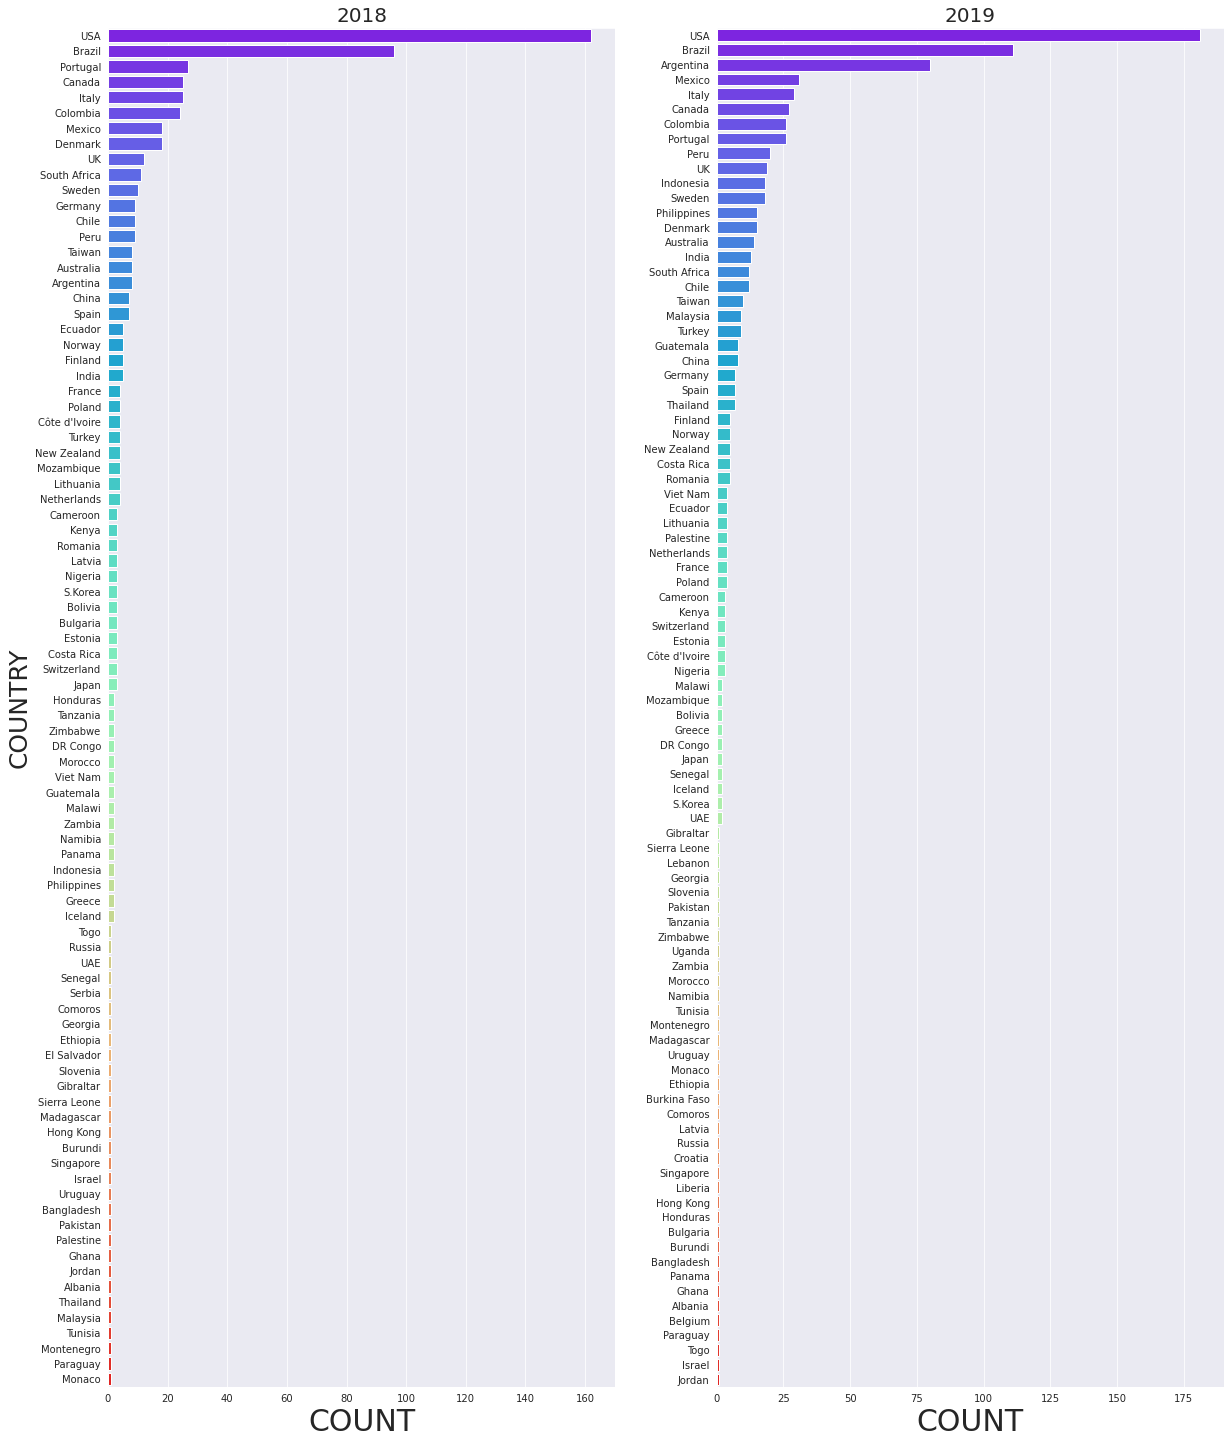

In [28]:
plt.figure(figsize=(20,25))
plt.subplot(1,2,1)
sns.countplot(y=c1['Country'],order = c1['Country'].value_counts().index,palette='rainbow')
plt.ylabel('COUNTRY',fontsize=25)
plt.xlabel('COUNT',fontsize=30)
plt.title('2018', fontsize= 20);

plt.subplot(1,2,2)
sns.countplot(y=c2['Country'],order = c2['Country'].value_counts().index,palette='rainbow')
plt.ylabel('',fontsize=10)
plt.xlabel('COUNT',fontsize=30)
plt.title('2019',fontsize= 20);

Text(0.5, 0, 'COUNT')

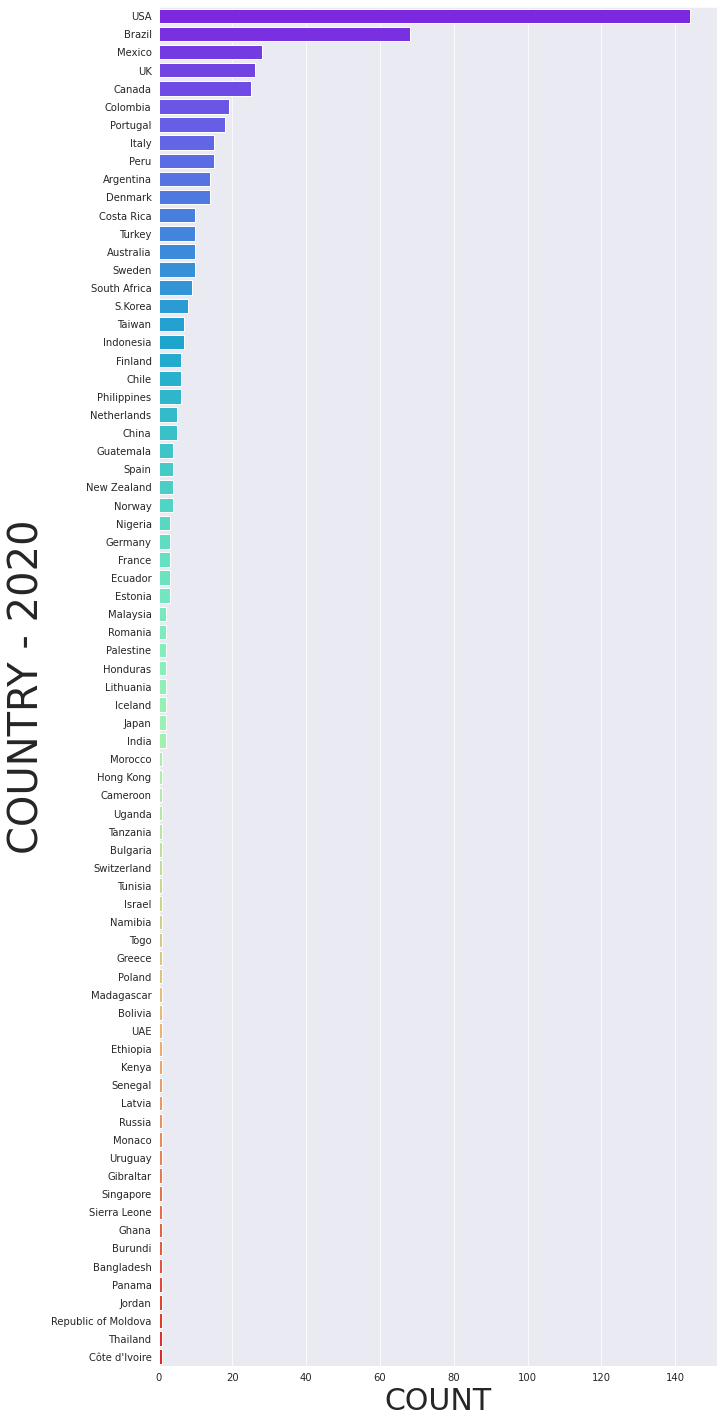

In [29]:
plt.figure(figsize=(10,25))
sns.countplot(y=c3['Country'],order = c3['Country'].value_counts().index,palette='rainbow')
plt.ylabel('COUNTRY - 2020',fontsize=40)
plt.xlabel('COUNT',fontsize=30)

### **CDP OPERATION DISTRIBUTION BASED ON REGION (YEAR - 20-18,19,20)**

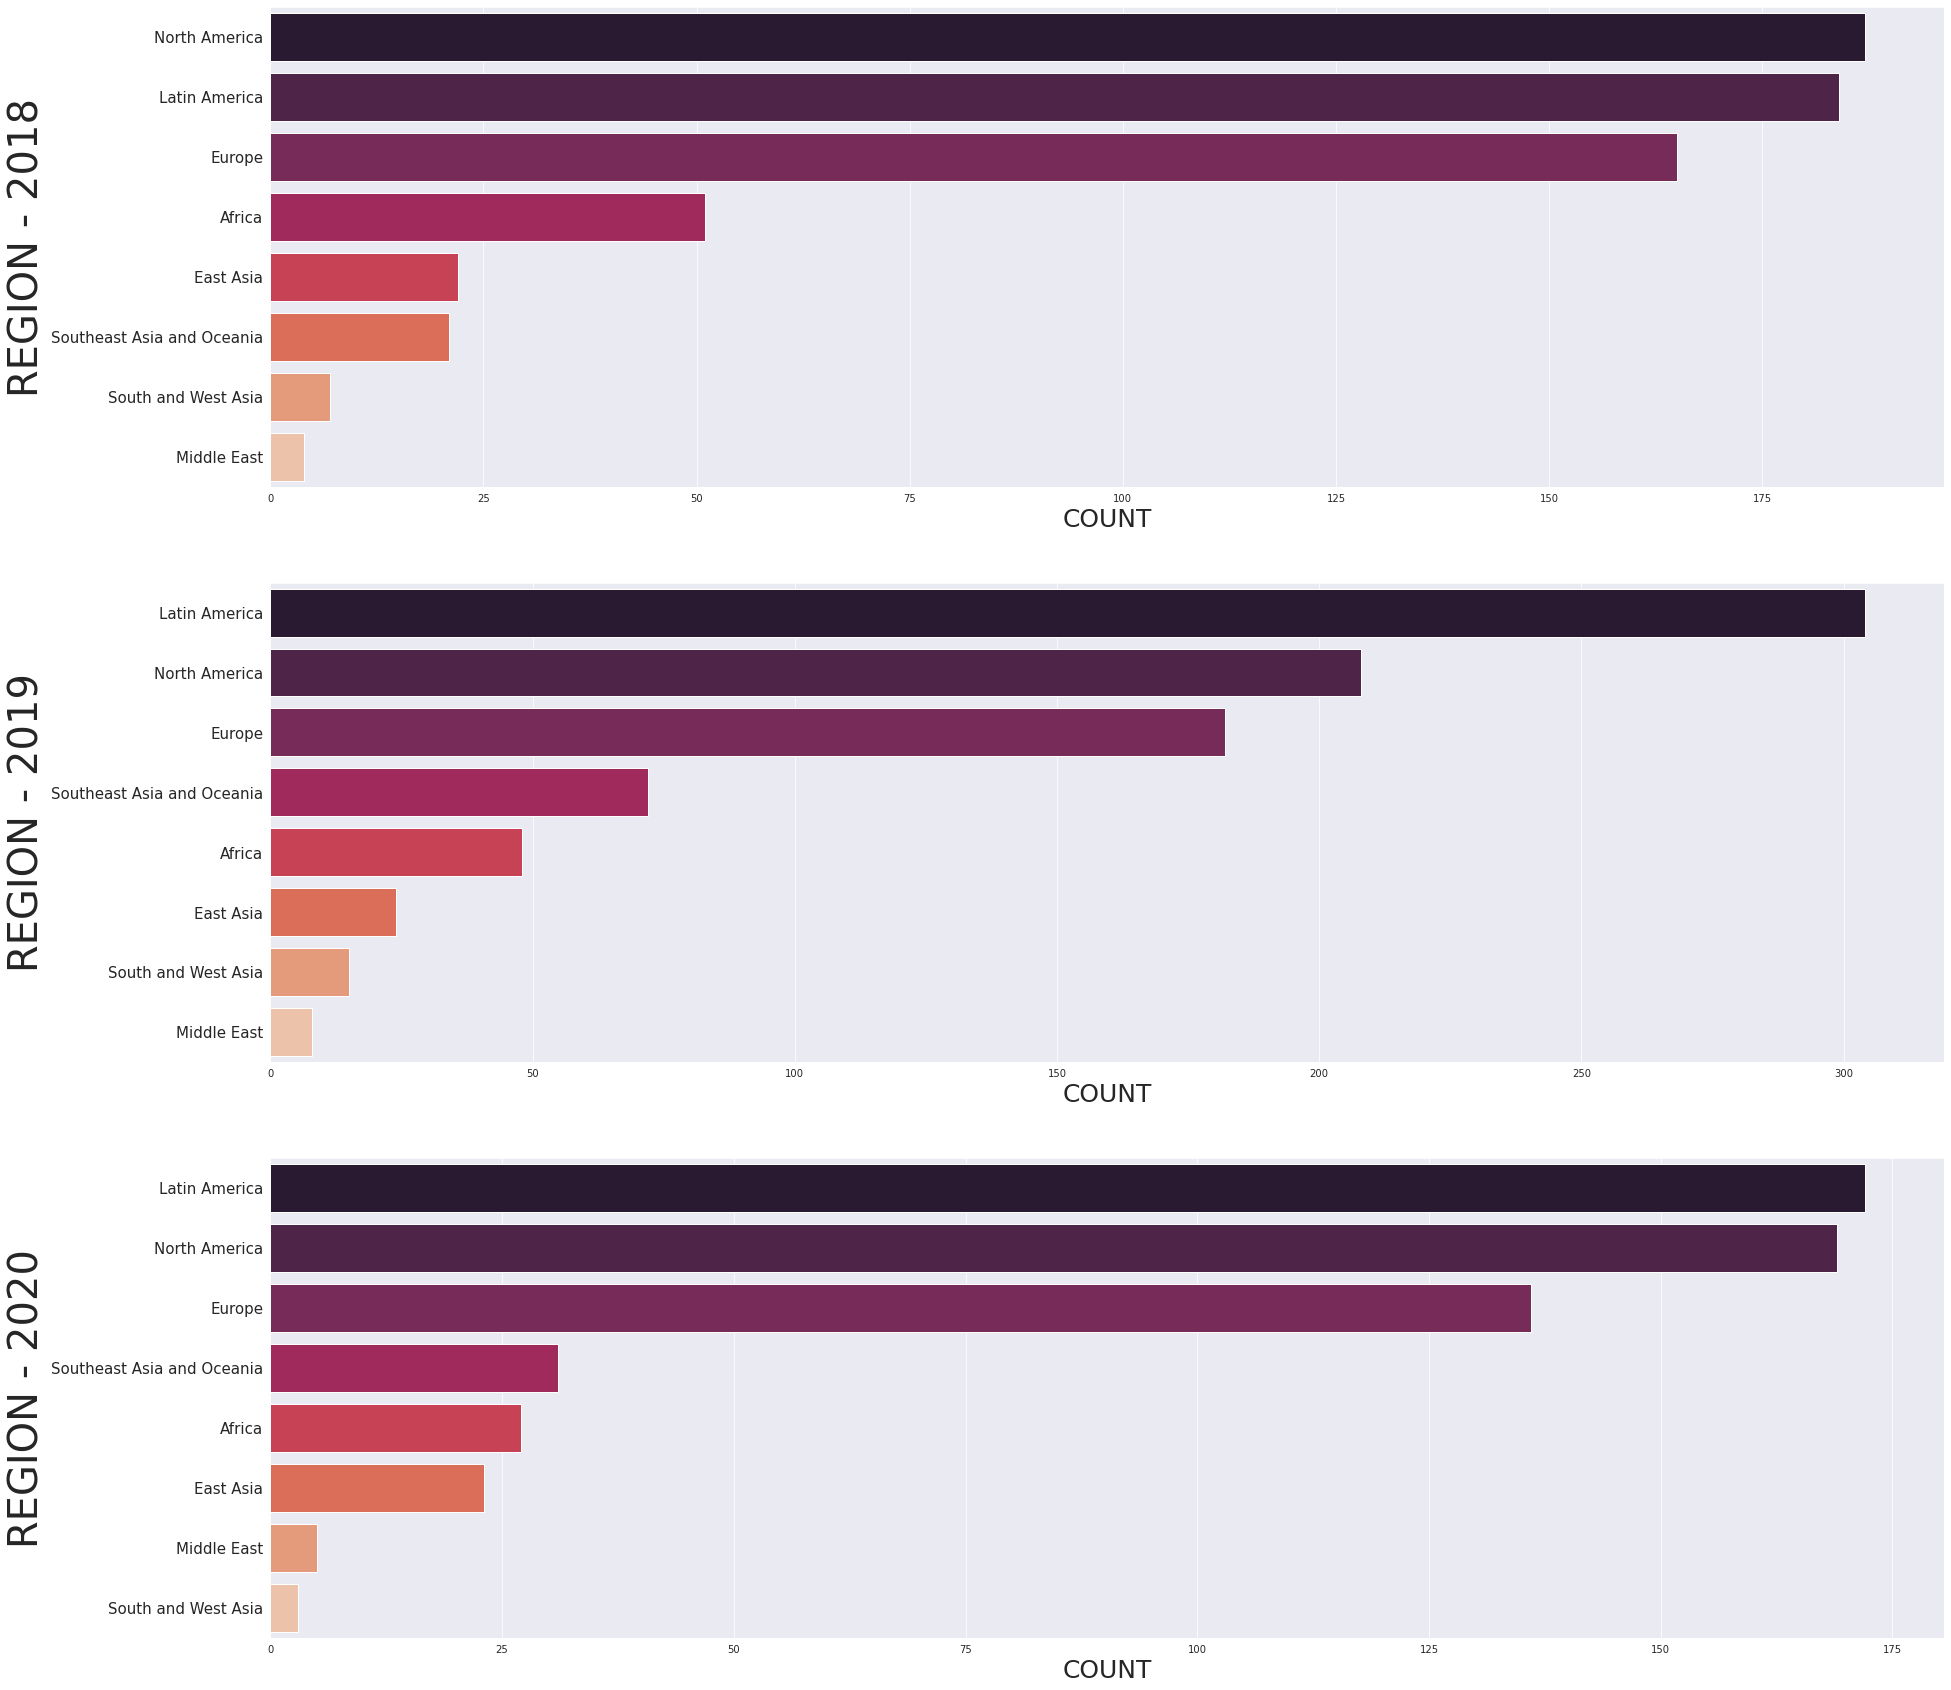

In [30]:
plt.figure(figsize=(30,30))
plt.subplot(3,1,1)
sns.countplot(y=c1['CDP Region'],order = c1['CDP Region'].value_counts().index,palette='rocket')
plt.ylabel('REGION - 2018',fontsize=40)
plt.xlabel('COUNT',fontsize=25)
plt.yticks(fontsize=15);

plt.subplot(3,1,2)
sns.countplot(y=c2['CDP Region'],order = c2['CDP Region'].value_counts().index,palette='rocket')
plt.ylabel('REGION - 2019',fontsize=40)
plt.xlabel('COUNT',fontsize=25)
plt.yticks(fontsize=15);


plt.subplot(3,1,3)
sns.countplot(y=c3['CDP Region'],order = c3['CDP Region'].value_counts().index,palette='rocket')
plt.ylabel('REGION - 2020',fontsize=40)
plt.xlabel('COUNT',fontsize=25)
plt.yticks(fontsize=15);


### **DISTRIBUTION OF CDP RESPONSE STATUS - PRIVATE/PUBLIC (YEAR - 20-18,19,20)**

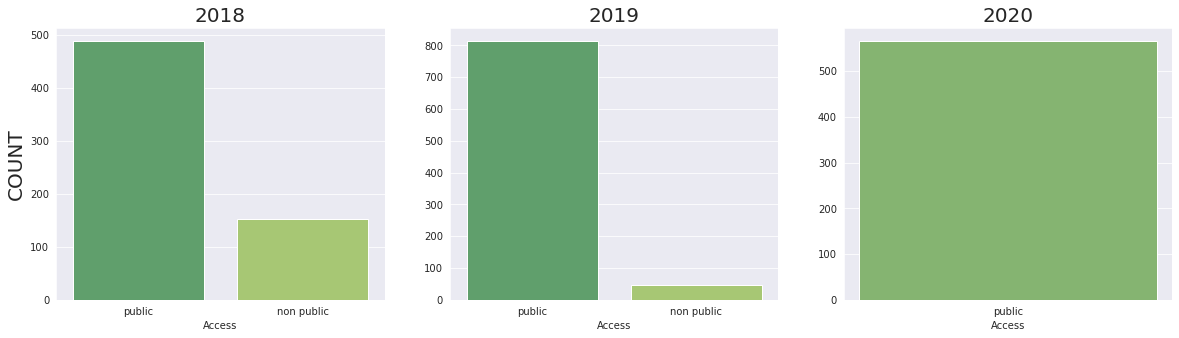

In [31]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.countplot(c1['Access'],palette='summer')
plt.ylabel('COUNT',fontsize=20)
plt.title('2018', fontsize= 20);

plt.subplot(1,3,2)
sns.countplot(c2['Access'],palette='summer')
plt.ylabel('')
plt.title('2019', fontsize= 20);

plt.subplot(1,3,3)
sns.countplot(c3['Access'],palette='summer')
plt.ylabel('')
plt.title('2020', fontsize= 20);

#### 2018 - In 2018, around one third of the responce status access was restricted to public.
#### 2019 - In 2019, the restriction for a public to access responce status got reduced comparatively with the               year 2018.
#### 2020 - In 2019, the restrcition was removed and made it entirely public. 

## **CITIES RESPONSES**

### PARENT SECTION DISTRIBUTION

In [32]:
c21.head()

,Questionnaire,Year Reported to CDP,Account Number,Organization,Country,CDP Region,Parent Section,Section,Question Number,Question Name,Column Number,Column Name,Row Number,Row Name,Response Answer,Comments,File Name,Last update
0,CDP Cities 2018,2018,3203,City of Chicago,United States of America,North America,Water,Wastewater,16.1,Please provide the percentage breakdown of the...,1,Percentage of wastewater collected,5,Other type of wastewater,NaN,NaN,NaN,24/06/2020 05:28:18 AM
1,CDP Cities 2018,2018,50555,City of Hamilton,Canada,North America,Climate Hazards,Climate Hazards,2.2a,Please list the most significant climate hazar...,5,Probability of hazard,4,NaN,Medium High,NaN,NaN,24/06/2020 05:28:18 AM
2,CDP Cities 2018,2018,50392,Prefeitura de Vitória,Brazil,Latin America,Emissions Reduction: City-wide,Emissions Reduction Actions : City-wide,8.4,What actions is your city taking to reduce emi...,1,Emissions reduction project activity,3,NaN,On-site renewable energy generation,NaN,NaN,24/06/2020 05:28:18 AM
3,CDP Cities 2018,2018,36522,Comune di Verbania,Italy,Europe,Strategy,Energy,9.0,Please indicate the energy mix of electricity ...,2,Gas,1,Energy consumption percentage,NaN,NaN,NaN,24/06/2020 05:28:18 AM
4,CDP Cities 2018,2018,35873,Municipality of Medellín,Colombia,Latin America,Climate Hazards,Climate Hazards,2.2a,Please list the most significant climate hazar...,3,Magnitude of impact,6,NaN,Serious,NaN,NaN,24/06/2020 05:28:18 AM


In [33]:
c21.columns

Index(['Questionnaire', 'Year Reported to CDP', 'Account Number',
       'Organization', 'Country', 'CDP Region', 'Parent Section', 'Section',
       'Question Number', 'Question Name', 'Column Number', 'Column Name',
       'Row Number', 'Row Name', 'Response Answer', 'Comments', 'File Name',
       'Last update'],
      dtype='object')

In [34]:
c21.shape

(186834, 18)

Text(0.5, 0, 'COUNT')

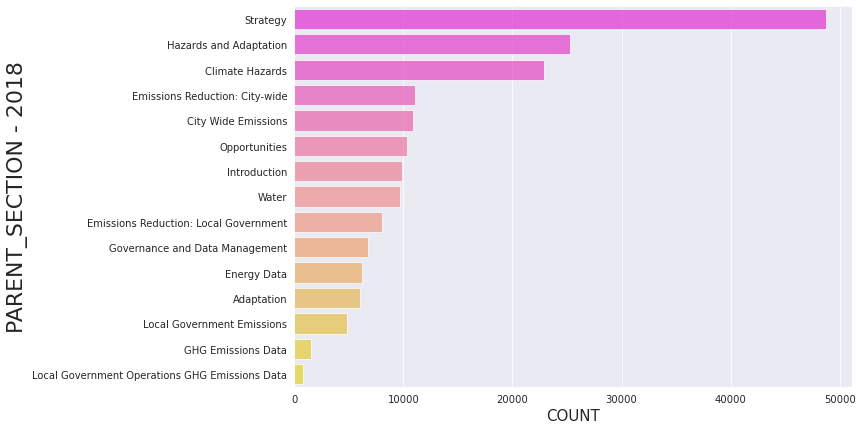

In [35]:
plt.figure(figsize=(10,7))
sns.countplot(y=c21['Parent Section'],order = c21['Parent Section'].value_counts().index,alpha=0.7,palette='spring')
plt.yticks(fontsize=10)
plt.ylabel('PARENT_SECTION - 2018', fontsize='22')
plt.xlabel('COUNT', fontsize='15')

Text(0.5, 0, 'COUNT')

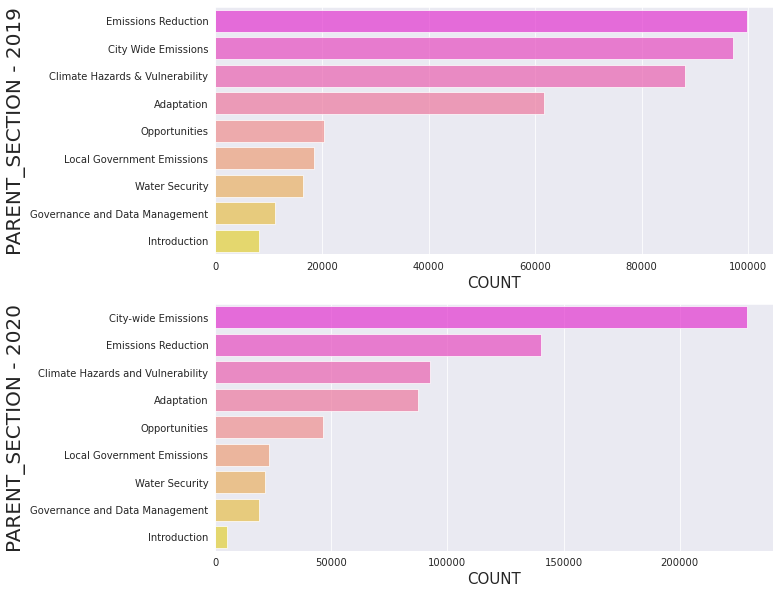

In [36]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
sns.countplot(y=c22['Parent Section'],order = c22['Parent Section'].value_counts().index,alpha=0.7,palette='spring')
plt.yticks(fontsize=10);
plt.ylabel('PARENT_SECTION - 2019', fontsize='20')
plt.xlabel('COUNT', fontsize='15')

plt.subplot(2,1,2)
sns.countplot(y=c23['Parent Section'],order = c23['Parent Section'].value_counts().index,alpha=0.7,palette='spring')
plt.yticks(fontsize=10);
plt.ylabel('PARENT_SECTION - 2020', fontsize='20')
plt.xlabel('COUNT', fontsize='15')

### SECTION DISTRIBUTION

Text(0.5, 0, 'COUNT')

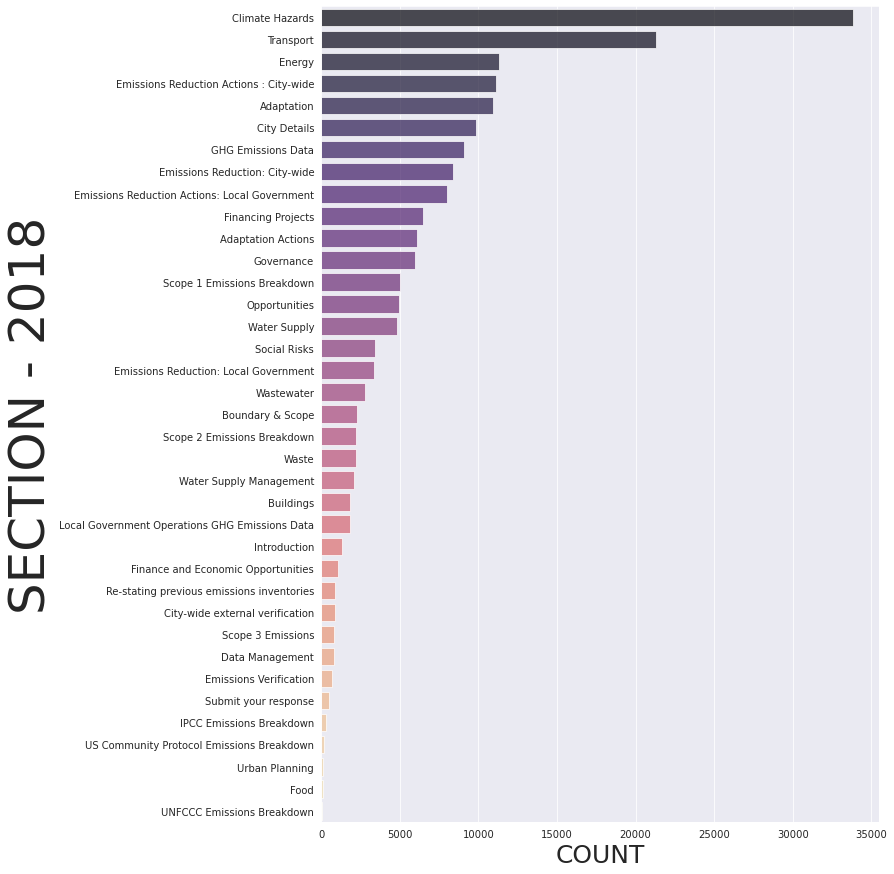

In [37]:
plt.figure(figsize=(10,15))
sns.countplot(y=c21['Section'],order = c21['Section'].value_counts().index,alpha=0.7,palette='magma')
plt.yticks(fontsize=10);
plt.ylabel('SECTION - 2018', fontsize='50')
plt.xlabel('COUNT', fontsize='25')

Text(0.5, 0, 'COUNT')

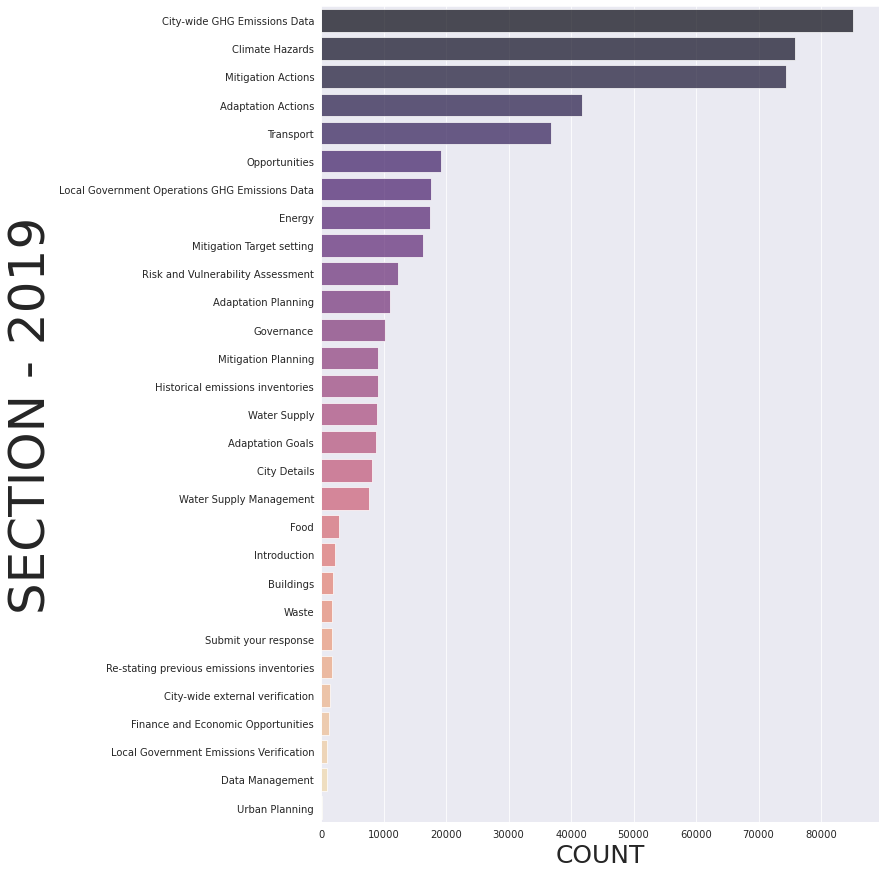

In [38]:
plt.figure(figsize=(10,15))
sns.countplot(y=c22['Section'],order = c22['Section'].value_counts().index,alpha=0.7,palette='magma')
plt.yticks(fontsize=10);
plt.ylabel('SECTION - 2019', fontsize='50')
plt.xlabel('COUNT', fontsize='25')

Text(0.5, 0, 'COUNT')

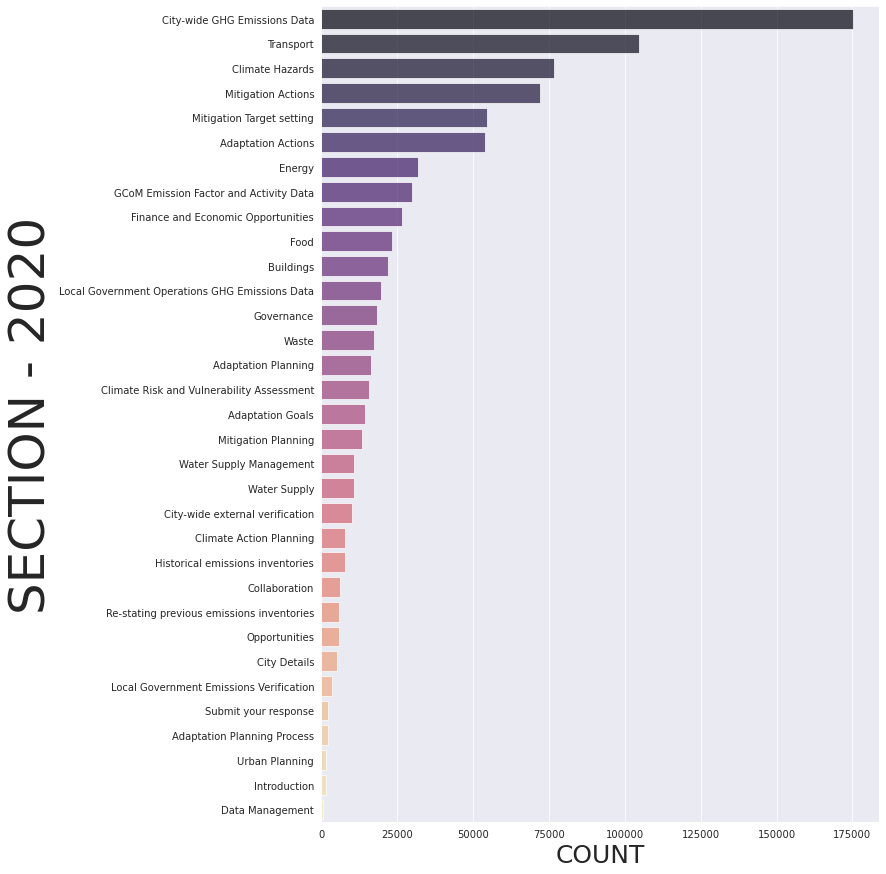

In [39]:
plt.figure(figsize=(10,15))
sns.countplot(y=c23['Section'],order = c23['Section'].value_counts().index,alpha=0.7,palette='magma')
plt.yticks(fontsize=10);
plt.ylabel('SECTION - 2020', fontsize='50')
plt.xlabel('COUNT', fontsize='25')

## **PERFORMING SENTIMENTAL ANALYSIS ON QUESTION NAME AND RESPONSE ANSWER:**

In [40]:
print(c21['Question Name'].duplicated().sum())
print(c22['Question Name'].duplicated().sum())
print(c23['Question Name'].duplicated().sum())

186667
486192
869147


In [41]:
c211 = c21['Question Name']
c211 = c211.drop_duplicates().reset_index()
c211 = c211.drop('index',axis=1)
c222 = c22['Question Name']
c222 = c222.drop_duplicates().reset_index()
c222 = c222.drop('index',axis=1)
c233 = c23['Question Name']
c233 = c233.drop_duplicates().reset_index()
c233 = c233.drop('index',axis=1)

In [42]:
c31 = c211.merge(c222, on='Question Name', how='right')
c32 = c31.merge(c233,on='Question Name', how='right')
c32

,Question Name
0,How many buses has your city procured in the l...
1,The Global Covenant of Mayors requires committ...
2,"List any mitigation, adaptation, water related..."
3,Please list the stakeholder engagement activit...
4,Please select the actions you are taking to re...
...,...
161,Describe how your local/regional government co...
162,How much of the solid waste generated in your ...
163,The Global Covenant of Mayors requires committ...
164,What is the size of your city’s park space in ...


In [43]:
c32['Question Name'] = c32['Question Name'].apply(lambda x: " ".join(x.lower() for x in x.split()))
c32['Question Name'].head()

0    how many buses has your city procured in the l...
1    the global covenant of mayors requires committ...
2    list any mitigation, adaptation, water related...
3    please list the stakeholder engagement activit...
4    please select the actions you are taking to re...
Name: Question Name, dtype: object

In [44]:
c32['Question Name'] = c32['Question Name'].str.replace('[^\w\s]','')
c32['Question Name'].head()

0    how many buses has your city procured in the l...
1    the global covenant of mayors requires committ...
2    list any mitigation adaptation water related o...
3    please list the stakeholder engagement activit...
4    please select the actions you are taking to re...
Name: Question Name, dtype: object

In [45]:
stop = stopwords.words('english')

c32['Question Name'] = c32['Question Name'].apply(lambda x: " ".join(x for x in x.split() if x not in stop));
c32['Question Name'].head()

0                   many buses city procured last year
1    global covenant mayors requires committed citi...
2    list mitigation adaptation water related resil...
3    please list stakeholder engagement activities ...
4    please select actions taking reduce risks city...
Name: Question Name, dtype: object

In [46]:
freq = pd.Series(' '.join(c32['Question Name']).split()).value_counts()[:10]
freq

please       95
city         82
emissions    60
provide      43
climate      34
citywide     28
citys        26
inventory    24
details      19
describe     19
dtype: int64

In [47]:
freq = list(freq.index)
c32['Question Name'] = c32['Question Name'].apply(
    lambda x: " ".join(x for x in x.split() if x not in freq))
c32['Question Name'].head()

0                        many buses procured last year
1    global covenant mayors requires committed citi...
2    list mitigation adaptation water related resil...
3    list stakeholder engagement activities relevan...
4    select actions taking reduce risks water security
Name: Question Name, dtype: object

In [48]:
freq = pd.Series(' '.join(c32['Question Name']).split()).value_counts()[-15:]
freq

potable         1
planned         1
tested          1
components      1
scenario        1
fte             1
established     1
demonstrated    1
language        1
consider        1
past            1
neutrality      1
pollution       1
dairy           1
world           1
dtype: int64

In [49]:
freq = list(freq.index)
c32['Question Name'] = c32['Question Name'].apply(
    lambda x: " ".join(x for x in x.split() if x not in freq))
c32['Question Name'].head()

0                        many buses procured last year
1    global covenant mayors requires committed citi...
2    list mitigation adaptation water related resil...
3    list stakeholder engagement activities relevan...
4    select actions taking reduce risks water security
Name: Question Name, dtype: object

In [50]:
st = PorterStemmer()
c32['Question Name'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0                             mani buse procur last year
1      global coven mayor requir commit citi report i...
2      list mitig adapt water relat resili project wi...
3       list stakehold engag activ relev stakehold group
4              select action take reduc risk water secur
                             ...                        
161    localregion govern collabor coordin horizont a...
162    much solid wast gener dispos landfil inciner t...
163    global coven mayor requir commit citi report i...
164                             size park space squar km
165             chang mitig energi access plan reduc ghg
Name: Question Name, Length: 166, dtype: object

In [51]:
c32['sentiment'] = c32['Question Name'].apply(lambda x: TextBlob(x).sentiment[0] )
c32[['Question Name','sentiment']].head()

,Question Name,sentiment
0,many buses procured last year,0.250000
1,global covenant mayors requires committed citi...,0.106061
2,list mitigation adaptation water related resil...,0.266667
3,list stakeholder engagement activities relevan...,0.400000
4,select actions taking reduce risks water security,0.000000


In [52]:
vader=vader()

In [53]:
c32['scores'] = c32['Question Name'].apply(lambda x: vader.polarity_scores(x))
c32['compound']=c32['scores'].apply(lambda score_dict: score_dict['compound']) 
c32['pos']=c32['scores'].apply(lambda score_dict: score_dict['pos'])
c32['neg']=c32['scores'].apply(lambda score_dict: score_dict['neg']) 
c32['neu']=c32['scores'].apply(lambda score_dict: score_dict['neu'])
c32=c32.drop('scores',axis=1)
c32

,Question Name,sentiment,compound,pos,neg,neu
0,many buses procured last year,0.250000,0.0000,0.000,0.000,1.000
1,global covenant mayors requires committed citi...,0.106061,0.6597,0.167,0.000,0.833
2,list mitigation adaptation water related resil...,0.266667,0.6597,0.213,0.000,0.787
3,list stakeholder engagement activities relevan...,0.400000,0.4588,0.333,0.000,0.667
4,select actions taking reduce risks water security,0.000000,0.0772,0.253,0.221,0.526
...,...,...,...,...,...,...
161,localregional government collaborates coordina...,0.100000,0.0000,0.000,0.000,1.000
162,much solid waste generated disposed landfill i...,-0.100000,-0.2960,0.154,0.269,0.577
163,global covenant mayors requires committed citi...,-0.054545,0.5574,0.150,0.000,0.850
164,size park space square km,0.000000,0.0000,0.000,0.000,1.000


In [54]:
c32['sentiment']=c32['sentiment'].astype(float)
c32.sentiment[c32.sentiment>0]=1
c32.sentiment[c32.sentiment<0]=-1;

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [55]:
c32

,Question Name,sentiment,compound,pos,neg,neu
0,many buses procured last year,1.0,0.0000,0.000,0.000,1.000
1,global covenant mayors requires committed citi...,1.0,0.6597,0.167,0.000,0.833
2,list mitigation adaptation water related resil...,1.0,0.6597,0.213,0.000,0.787
3,list stakeholder engagement activities relevan...,1.0,0.4588,0.333,0.000,0.667
4,select actions taking reduce risks water security,0.0,0.0772,0.253,0.221,0.526
...,...,...,...,...,...,...
161,localregional government collaborates coordina...,1.0,0.0000,0.000,0.000,1.000
162,much solid waste generated disposed landfill i...,-1.0,-0.2960,0.154,0.269,0.577
163,global covenant mayors requires committed citi...,-1.0,0.5574,0.150,0.000,0.850
164,size park space square km,0.0,0.0000,0.000,0.000,1.000


## **SENTIMENTAL ANALYSIS ON QUESTION / RESPONSE ANSWER:**

In [57]:
c41=c21['Response Answer']
c42=c22['Response Answer']
c43=c23['Response Answer']

In [59]:
c41=c41.drop_duplicates().reset_index()
c42=c42.drop_duplicates().reset_index()
c43=c43.drop_duplicates().reset_index()

In [60]:
c41=c41.drop('index', axis=1)
c42=c42.drop('index', axis=1)
c43=c43.drop('index', axis=1)

In [61]:
c51 = c41.merge(c42, how='right',on='Response Answer')
c52 = c51.merge(c43, how='right',on='Response Answer')

In [62]:
c53 = c52.dropna()
c53

,Response Answer
0,Question not applicable
2,Liquefied Petroleum Gas (LPG)
3,2015
4,Flood and sea level rise > Flash / surface flood
5,21
...,...
69195,815970
69196,Espaços intervencionados (n.º; Ha)Redução dos ...
69197,eGRID Data 2012 (latest version)
69198,This strategy is a capital facility improvemen...


In [63]:
c53['Response Answer'] = c53['Response Answer'].apply(lambda x: " ".join(x.lower() for x in x.split()))
c53['Response Answer'].head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0                             question not applicable
2                       liquefied petroleum gas (lpg)
3                                                2015
4    flood and sea level rise > flash / surface flood
5                                                  21
Name: Response Answer, dtype: object

In [64]:
c53['Response Answer'] = c53['Response Answer'].str.replace('[^\w\s]','')
c53['Response Answer'].head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0                           question not applicable
2                       liquefied petroleum gas lpg
3                                              2015
4    flood and sea level rise  flash  surface flood
5                                                21
Name: Response Answer, dtype: object

In [65]:
stop = stopwords.words('english')

c53['Response Answer'] = c53['Response Answer'].apply(lambda x: " ".join(x for x in x.split() if x not in stop));
c53['Response Answer'].head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0                         question applicable
2                 liquefied petroleum gas lpg
3                                        2015
4    flood sea level rise flash surface flood
5                                          21
Name: Response Answer, dtype: object

In [66]:
freq = pd.Series(' '.join(c53['Response Answer']).split()).value_counts()[:10]
freq

de         61485
la         17763
city       16413
en         11395
energy     11230
el         10769
e          10512
climate     9918
water       9166
plan        8803
dtype: int64

In [67]:
freq = list(freq.index)
c53['Response Answer'] = c53['Response Answer'].apply(
    lambda x: " ".join(x for x in x.split() if x not in freq))
c53['Response Answer'].head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0                         question applicable
2                 liquefied petroleum gas lpg
3                                        2015
4    flood sea level rise flash surface flood
5                                          21
Name: Response Answer, dtype: object

In [68]:
freq = pd.Series(' '.join(c53['Response Answer']).split()).value_counts()[-10:]
freq

2857                                                                 1
togetherness                                                         1
chennaiwwwchennaicorporationgovin                                    1
20150630                                                             1
programswhile                                                        1
httpwwwcampinasspgovbrarquivosmeioambienteemissaogasesproduto7pdf    1
saudáveiso                                                           1
2016s                                                                1
276756                                                               1
httpwwwsigeoniteroirjgovbr                                           1
dtype: int64

In [69]:
freq = list(freq.index)
c53['Response Answer'] = c53['Response Answer'].apply(
    lambda x: " ".join(x for x in x.split() if x not in freq))
c53['Response Answer'].head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0                         question applicable
2                 liquefied petroleum gas lpg
3                                        2015
4    flood sea level rise flash surface flood
5                                          21
Name: Response Answer, dtype: object

In [70]:
st = PorterStemmer()
c53['Response Answer'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
c53['Response Answer'].head()

0                         question applicable
2                 liquefied petroleum gas lpg
3                                        2015
4    flood sea level rise flash surface flood
5                                          21
Name: Response Answer, dtype: object

In [71]:
c53['sentiment'] = c53['Response Answer'].apply(lambda x: TextBlob(x).sentiment[0] )
c53[['Response Answer','sentiment']].head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Response Answer,sentiment
0,question applicable,0.0
2,liquefied petroleum gas lpg,0.0
3,2015,0.0
4,flood sea level rise flash surface flood,0.0
5,21,0.0


In [72]:
c53['scores'] = c53['Response Answer'].apply(lambda x: vader.polarity_scores(x))
c53['compound']=c53['scores'].apply(lambda score_dict: score_dict['compound']) 
c53['pos']=c53['scores'].apply(lambda score_dict: score_dict['pos'])
c53['neg']=c53['scores'].apply(lambda score_dict: score_dict['neg']) 
c53['neu']=c53['scores'].apply(lambda score_dict: score_dict['neu'])
c53=c53.drop('scores',axis=1)
c53

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,Response Answer,sentiment,compound,pos,neg,neu
0,question applicable,0.00,0.0000,0.000,0.000,1.000
2,liquefied petroleum gas lpg,0.00,0.0000,0.000,0.000,1.000
3,2015,0.00,0.0000,0.000,0.000,1.000
4,flood sea level rise flash surface flood,0.00,0.0000,0.000,0.000,1.000
5,21,0.00,0.0000,0.000,0.000,1.000
...,...,...,...,...,...,...
69195,815970,0.00,0.0000,0.000,0.000,1.000
69196,espaços intervencionados nº haredução dos epis...,0.00,0.0000,0.000,0.000,1.000
69197,egrid data 2012 latest version,0.50,0.0000,0.000,0.000,1.000
69198,strategy capital facility improvement program ...,-0.25,-0.1779,0.101,0.153,0.746


In [73]:
c53['sentiment']=c53['sentiment'].astype(float)
c53.sentiment[c53.sentiment>0]=1
c53.sentiment[c53.sentiment<0]=-1;

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, '')

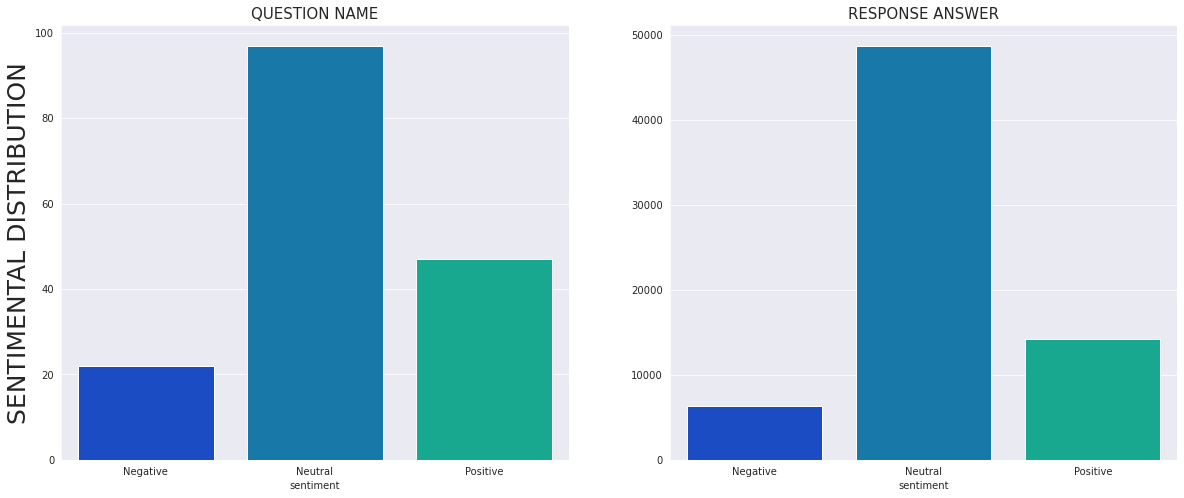

In [74]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
ax=sns.countplot(c32['sentiment'],palette='winter')
ax.set_xticklabels(['Negative','Neutral','Positive']);
plt.ylabel('SENTIMENTAL DISTRIBUTION', fontsize=25)
plt.title('QUESTION NAME', fontsize=15)

plt.subplot(1,2,2)
ax=sns.countplot(c53['sentiment'],palette='winter')
ax.set_xticklabels(['Negative','Neutral','Positive'])
plt.title('RESPONSE ANSWER', fontsize=15)
plt.ylabel('')